In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.core.dtypes.missing import isna
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Loaner Data Set 

In the **'loan.csv'** file, we can find the loans issues througth the time period from 2007 to 2011 and i am going to use the dataset to identify the risk in lending 

### Critical case study 

If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company


If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

In [4]:
loandataset = pd.read_csv('/content/drive/MyDrive/Upgrad/Data Analysis/CaseStudy/loan.csv')

loandataset.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loandataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [79]:
loandataset.shape

(39717, 115)

In [47]:
# distribution of the employment length

def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

loandataset['emp_length_num'] = loandataset['emp_length'].apply(emp_to_num)

#(loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).plot.bar()

In [46]:

#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
loandataset['loan_status_bin'] = loandataset['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [65]:
loandataset['long_emp'] = loandataset['emp_length'].apply(lambda x: 1*(x=='10+ years'))
loandataset['short_emp'] = loandataset['emp_length'].apply(lambda x: 1*(x=='1 year' or x=='< 1 year'))


In [74]:
loandataset['int_rate'] = loandataset['int_rate'].str[:-1].astype(float)

In [67]:
pd.pivot_table(loandataset, index=['term', 'loan_status'], values='id', aggfunc='count').head(10)

id
term       loan_status       
 36 months Charged Off   3227
           Fully Paid   25869
 60 months Charged Off   2400
           Current       1140
           Fully Paid    7081

In [82]:
loandataset.groupby('grade')['int_rate'].mean() 

grade
A     7.335262
B    11.021224
C    13.552960
D    15.719900
E    17.711714
F    19.749323
G    21.401044
Name: int_rate, dtype: float64

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_num,loan_status_bin,long_emp,short_emp
223,1060644,1292408,24250,18100,18075.000000,60 months,23.91,519.76,G,G4,...,0.0,0.0,NaN,NaN,NaN,NaN,7.0,0.0,0,0
540,1062756,1271501,13000,13000,13000.000000,60 months,23.52,370.38,G,G3,...,0.0,0.0,NaN,NaN,NaN,NaN,10.0,NaN,1,0
601,1058624,1290219,12375,12375,12375.000000,60 months,23.13,349.79,G,G2,...,0.0,0.0,NaN,NaN,NaN,NaN,5.0,1.0,0,0
616,1061914,1293952,22400,22400,22400.000000,60 months,22.74,628.13,G,G1,...,0.0,0.0,NaN,NaN,NaN,NaN,6.0,1.0,0,0
733,1060753,1292527,24925,24925,24900.000000,60 months,23.91,715.75,G,G4,...,0.0,0.0,NaN,NaN,NaN,NaN,4.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36227,417986,487603,1600,1600,1600.000000,36 months,19.16,58.78,G,G2,...,0.0,0.0,NaN,NaN,NaN,NaN,4.0,0.0,0,0
38184,362809,372424,24000,24000,8213.723301,36 months,18.72,876.36,G,G3,...,1.0,0.0,NaN,NaN,NaN,NaN,8.0,1.0,0,0
38209,362421,371796,12500,12500,8074.432836,36 months,19.04,458.46,G,G4,...,0.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,0,0
39039,277709,275527,25000,25000,7625.000000,36 months,17.34,895.56,G,G1,...,NaN,0.0,NaN,NaN,NaN,NaN,3.0,0.0,0,0


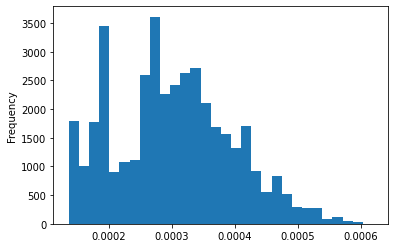

In [81]:
# the distirubtion of the interest rates

(loandataset['int_rate']/len(loandataset)).plot.hist(bins=30)

**Getting Initial Loan Analysis  Data for verification ➰**

In [85]:
grade_vs_intrate = loandataset.groupby('grade')['int_rate'].mean().reset_index() 
grade_vs_intrate

,grade,int_rate
0,A,7.335262
1,B,11.021224
2,C,13.552960
3,D,15.719900
4,E,17.711714
5,F,19.749323
6,G,21.401044


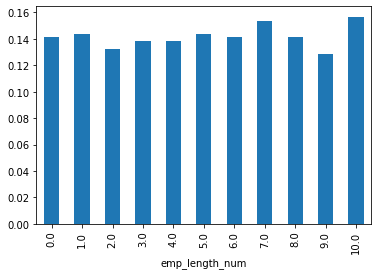

In [58]:
loandataset.groupby('emp_length_num')['loan_status_bin'].mean().plot.bar()

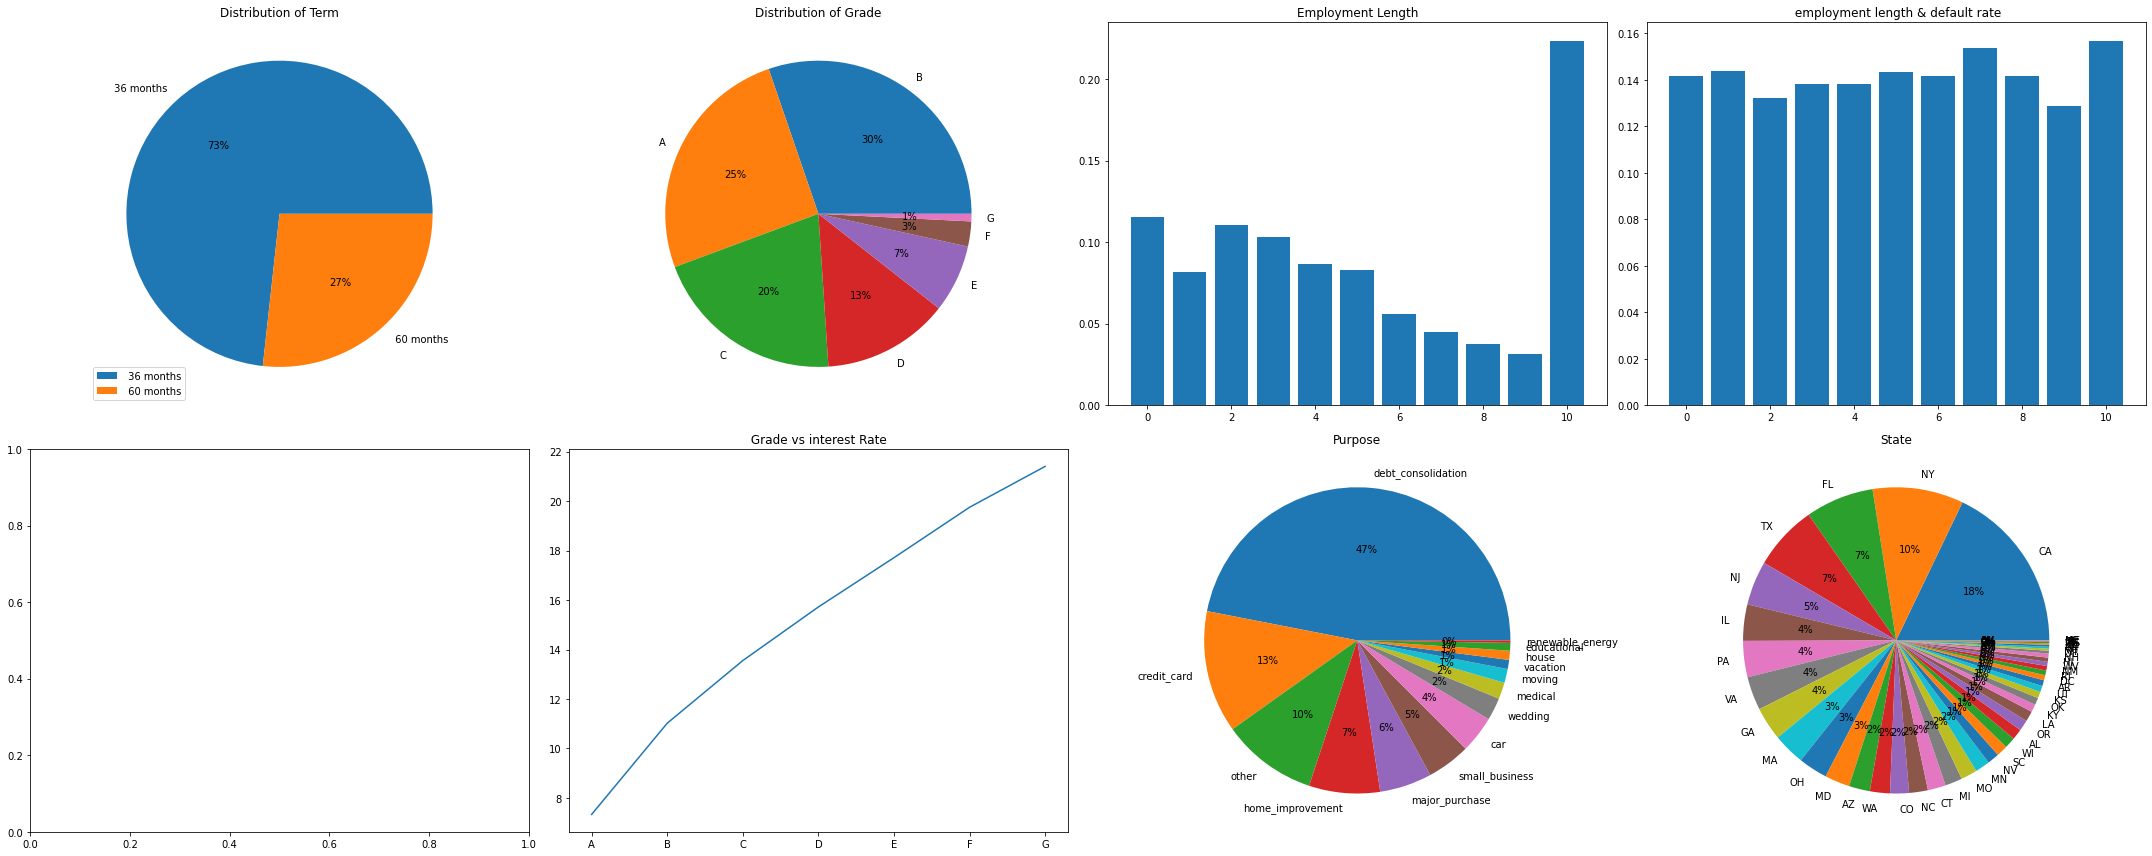

In [86]:
term_data_1 =  loandataset['term'].value_counts().reset_index()

#distribution of grades
grade_data_1 =  loandataset['grade'].value_counts().reset_index()

purpose_data_1 = loandataset['purpose'].value_counts().reset_index()
state_data_1 = loandataset['addr_state'].value_counts().reset_index()

# distribution of the employment length
employee_length_data_1 = (loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).reset_index()

# connection between employment length and default rate
employee_length_def_rate =  loandataset.groupby('emp_length_num')['loan_status_bin'].mean().reset_index()

# Grade vs interest Rate 
grade_vs_intrate = loandataset.groupby('grade')['int_rate'].mean().reset_index() 



fig, axs  = plt.subplots(nrows = 2, ncols=4,figsize=(30,12))

#fig = plt.figure(figsize=(20,20))
axs[0,0].pie(term_data_1['term'], labels=term_data_1['index'],  autopct='%.0f%%')
axs[0,0].legend()
axs[0,0].set_title("Distribution of Term")

axs[0,1].pie(grade_data_1['grade'], labels=grade_data_1['index'],  autopct='%.0f%%')
#axs[0,1].legend()
axs[0,1].set_title("Distribution of Grade")

axs[1,2].pie(purpose_data_1['purpose'], labels=purpose_data_1['index'],  autopct='%.0f%%')
axs[1,2].set_title("Purpose")

axs[1,3].pie(state_data_1['addr_state'], labels=state_data_1['index'],  autopct='%.0f%%')
axs[1,3].set_title("State")

axs[0,2].bar(employee_length_data_1['index'] , employee_length_data_1['emp_length_num'] )
axs[0,2].set_title("Employment Length")

axs[0,3].bar(employee_length_def_rate['emp_length_num'] , employee_length_def_rate['loan_status_bin'] )
axs[0,3].set_title(" employment length & default rate")


axs[1,1].plot(grade_vs_intrate['grade'] , grade_vs_intrate['int_rate'] )
axs[1,1].set_title(" Grade vs interest Rate ")


plt.tight_layout()
plt.show()

In [9]:
ChargedOff_loandataset =  loandataset[loandataset["loan_status"] == "Charged Off"]

#ChargedOff_loandataset 

#ChargedOff_loandataset.plot.pie()

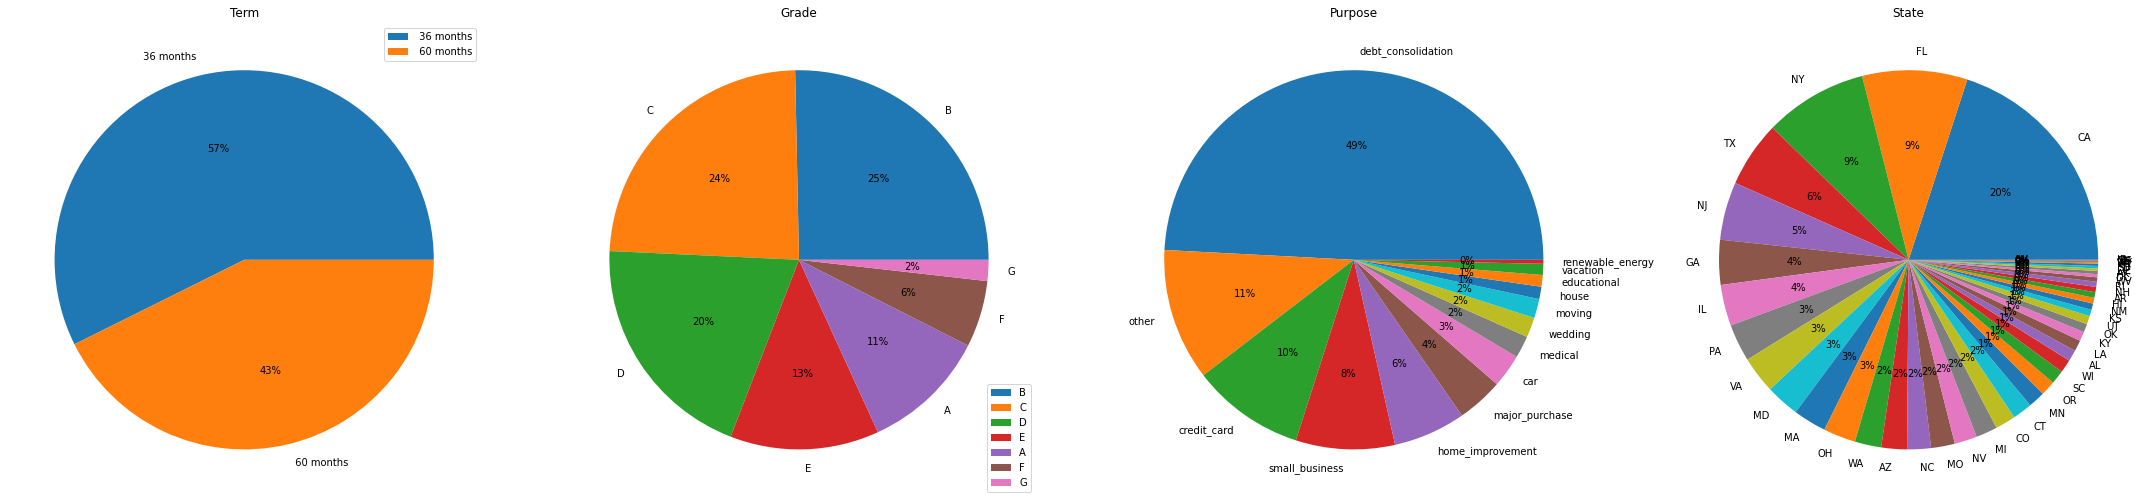

In [ ]:

term_data = ChargedOff_loandataset['term'].value_counts().reset_index()
grade_data = ChargedOff_loandataset['grade'].value_counts().reset_index()
purpose_data =ChargedOff_loandataset['purpose'].value_counts().reset_index()
state_data =ChargedOff_loandataset['addr_state'].value_counts().reset_index()

fig , (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols=4,figsize=(30,30))

#fig = plt.figure(figsize=(20,20))
ax1.pie(term_data['term'], labels=term_data['index'],  autopct='%.0f%%')
ax1.legend()
ax1.set_title("Term")

ax2.pie(grade_data['grade'], labels=grade_data['index'],  autopct='%.0f%%')
ax2.legend()
ax2.set_title("Grade")

ax3.pie(purpose_data['purpose'], labels=purpose_data['index'],  autopct='%.0f%%')
#ax3.legend()
ax3.set_title("Purpose")

ax4.pie(state_data['addr_state'], labels=state_data['index'],  autopct='%.0f%%')
#ax4.legend()
ax4.set_title("State")

plt.tight_layout()
plt.show()  



In [ ]:
loandataset.shape

(39717, 111)

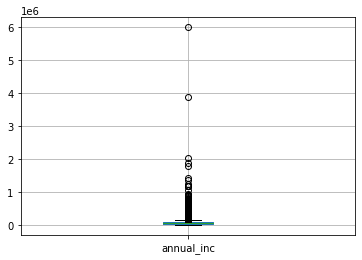

In [ ]:
loandataset.boxplot(column='annual_inc')

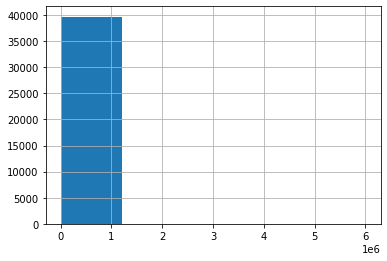

In [ ]:
loandataset["annual_inc"].hist(bins=5)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


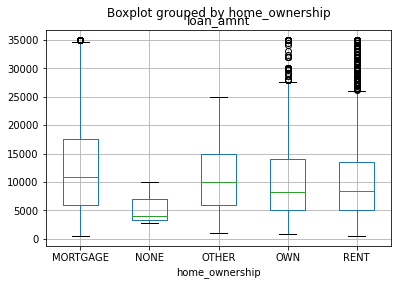

In [ ]:
loandataset.boxplot(column='loan_amnt', by='home_ownership')

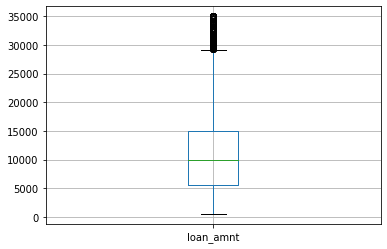

In [ ]:
loandataset.boxplot(column='loan_amnt')

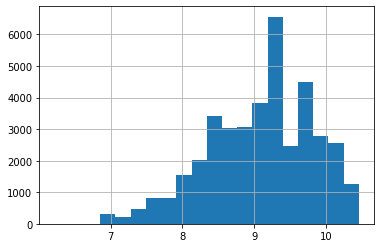

In [ ]:
loandataset["loan_amnt_log"] = np.log(loandataset["loan_amnt"])
loandataset["loan_amnt_log"].hist(bins=20)

In [ ]:
#loandataset.info(verbose=True, show_counts=True)
loandataset.isnull().sum()
obj = loandataset.isnull().sum()
for key,value in obj.iteritems():
  if(value != 0) :
    print(key,",",value)

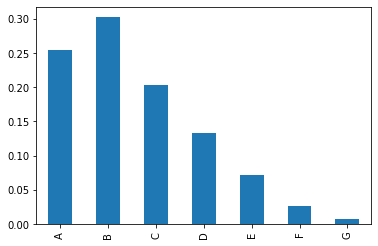

In [22]:
#distribution of grades

(loandataset['grade'].value_counts().sort_index()/len(loandataset)).plot.bar()

In [ ]:
loandataset.groupby('grade')['loan_status_bin'].mean().plot.line()

KeyError: ignored